In [90]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix, SCORERS
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [91]:
# Load in data and check it
bankCSV = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
print(bankCSV.shape)
print("Number of N/A values:", bankCSV.isna().sum(), "\n")
bankCSV = bankCSV.dropna() #Check if there are any missing values in the dataset. If there are, drop the rows.
print(bankCSV.columns)
bankCSV.head()

(41188, 21)
Number of N/A values: age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64 

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Use LabelEncoder to convert the label into numbers.


In [92]:
bankCSV[['y']] = bankCSV[['y']].apply(LabelEncoder().fit_transform)

# Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)

In [93]:
df_dummies = pd.get_dummies(bankCSV)
xBank = df_dummies
yBank = bankCSV[bankCSV.columns[-1]]

print(df_dummies['y'])

print(df_dummies)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32
       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1  

# Column "duration" must be deleted

In [133]:
bankCSV.drop(["duration"], axis=1, inplace=True)
bankCSV.shape

(41188, 20)

# Plot histogram of the label

<AxesSubplot:ylabel='Count'>

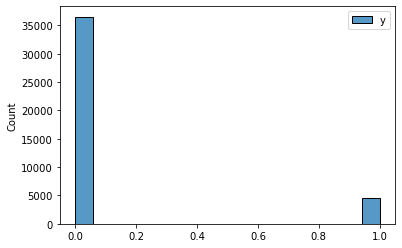

In [95]:
sns.histplot(bankCSV[['y']])

# calculate the imbalance in the dataset.

In [96]:
 # # #

## Data Modelling

In [97]:
x_train, x_test, y_train, y_test = train_test_split(
                    xBank, yBank, stratify = df_dummies['y'], test_size = 0.2, random_state = 50)
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [137]:
# Creation of dummy classifier
dummyClassifier = DummyClassifier(strategy = 'stratified')
dummyScores = cross_val_score(dummyClassifier, x_train, y_train, cv = 10, scoring = make_scorer(f1_score))
print("F1 Score for dummy classifier:", dummyScores.mean()) #F1 Score for dummy classifier

F1 Score for dummy classifier: 0.11594400191653116


In [138]:
# Report the results of 10-fold stratified cross-validation on the training set using a 
# random forest classifier with 100 trees and depth = 3.
randForestClass = RandomForestClassifier(n_estimators = 100, max_depth = 3)
scores = cross_val_score(randForestClass, x_train, y_train, cv = 10, scoring = make_scorer(f1_score))

print("F1 Score:", scores.mean())

F1 Score: 0.6800809510917285


# Use GridSearchCV to find a better set of parameters for your random forest.

In [111]:
params = {
    'n_estimators':[100,200,300],
    'max_depth':[2,4,6,8],
    "max_features": ['auto', 'log2', 'sqrt']
}

gridSCV = GridSearchCV(estimator=randForestClass, param_grid = params, cv = 5, n_jobs = 6, verbose = 1)
gridSCV.fit(x_train, y_train)
print("Best found params with gridSearchCV: ", gridSCV.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   18.4s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:  1.5min finished


Best found params with gridSearchCV:  {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


In [112]:
# Best found params with gridSearchCV:  {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}
cross_val_score(estimator = gridSCV, X = x_train, y = y_train, scoring = "accuracy")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:  1.1min finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:  1.1min finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.9s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:  1.1min finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:  1.1min finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


KeyboardInterrupt: 

In [113]:
print("Best accuracy: ", gridSCV.best_score_, "%")
print("Best found params: ", gridSCV.best_params_)

Best accuracy:  1.0 %
Best found params:  {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


In [123]:
# What are the top 3 features?
importances = gridSCV.best_estimator_.feature_importances_
ind = np.argsort(importances)[::-1]
features = x_train.columns.values

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[ind[f]],  importances[ind[f]]))

1. y (0.614915)
2. duration (0.112295)
3. nr.employed (0.056231)
4. euribor3m (0.044057)
5. pdays (0.035062)
6. emp.var.rate (0.028634)
7. poutcome_success (0.024488)
8. cons.conf.idx (0.016759)
9. cons.price.idx (0.014611)
10. previous (0.007157)
11. age (0.006447)
12. month_may (0.004945)
13. month_mar (0.003750)
14. poutcome_failure (0.003666)
15. month_oct (0.003529)
16. contact_cellular (0.003529)
17. poutcome_nonexistent (0.003309)
18. contact_telephone (0.002786)
19. month_apr (0.001840)
20. month_sep (0.001456)
21. default_no (0.000924)
22. month_jun (0.000867)
23. campaign (0.000748)
24. job_blue-collar (0.000682)
25. day_of_week_mon (0.000667)
26. job_student (0.000480)
27. default_unknown (0.000440)
28. job_retired (0.000370)
29. education_university.degree (0.000370)
30. month_aug (0.000367)
31. day_of_week_fri (0.000259)
32. education_basic.9y (0.000237)
33. day_of_week_thu (0.000235)
34. month_dec (0.000228)
35. marital_married (0.000227)
36. day_of_week_tue (0.000216)
37

In [125]:
# Report the generalisation error (still using the same metric) on your test set.

f1_score(y_test, gridSCV.predict(x_test))

1.0

In [140]:
bankCSV1 = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
#bankCSV1.dropna()

bankCSV1

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64